In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('satisfaction.csv',skiprows=0,nrows=4000)
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.shape

(4000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   satisfaction_v2                    4000 non-null   object 
 2   Gender                             4000 non-null   object 
 3   Customer Type                      4000 non-null   object 
 4   Age                                4000 non-null   int64  
 5   Type of Travel                     4000 non-null   object 
 6   Class                              4000 non-null   object 
 7   Flight Distance                    4000 non-null   int64  
 8   Seat comfort                       4000 non-null   int64  
 9   Departure/Arrival time convenient  4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Gate location                      4000 non-null   int64

In [5]:
#preprocessing

In [6]:
#handling with missing value

In [7]:
df.isna().sum()

id                                    0
satisfaction_v2                       0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             22
dtype: int64

In [8]:
df['Arrival Delay in Minutes'].mode()[0]

0.0

In [9]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0],inplace=True)

In [10]:
df.isna().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
#Dealing with outliers

<AxesSubplot:>

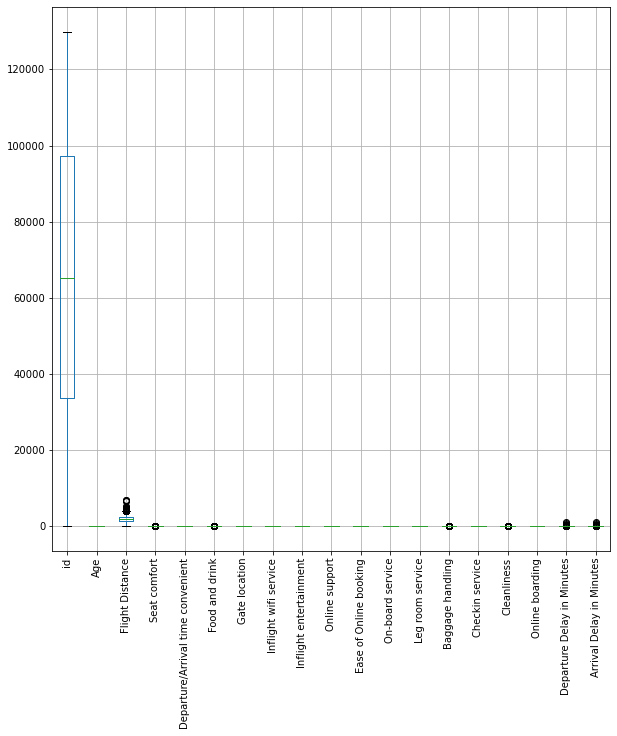

In [12]:
plt.figure(figsize=(10,10))
df.boxplot(rot=90)

Outliers are in 
.Flight Distance
.Departure Delay in Minutes
.Arrival Delay in Minutes


In [13]:
def outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr=q3-q1
    floor=q1-1.5*iqr
    ceiling=q3+1.5*iqr
    return floor,ceiling
    

In [14]:
up_bound,l_bound=outliers(df['Departure Delay in Minutes'])
print('Outliers lowerbound=',l_bound)
print('Outliers uppernound=',up_bound)


Outliers lowerbound= 27.5
Outliers uppernound= -16.5


In [15]:
med=np.median(df['Departure Delay in Minutes'])
for i in df['Departure Delay in Minutes']:
    if ((i>up_bound) or (i<l_bound)):
        df['Departure Delay in Minutes']=df['Departure Delay in Minutes'].replace(i,med)
        
        

In [16]:
up_bound,l_bound=outliers(df['Arrival Delay in Minutes'])
print('Outliers lowerbound=',l_bound)
print('Outliers uppernound=',up_bound)


Outliers lowerbound= 30.0
Outliers uppernound= -18.0


In [17]:
med=np.median(df['Arrival Delay in Minutes'])
for i in df['Arrival Delay in Minutes']:
    if ((i>up_bound) or (i<l_bound)):
        df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].replace(i,med)

<AxesSubplot:>

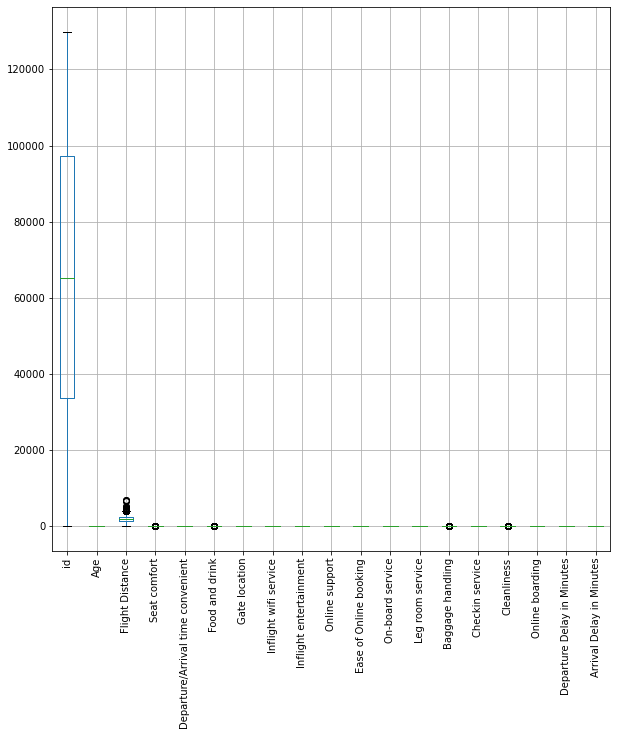

In [18]:
plt.figure(figsize=(10,10))
df.boxplot(rot=90)


In [19]:
#encoding

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   satisfaction_v2                    4000 non-null   object 
 2   Gender                             4000 non-null   object 
 3   Customer Type                      4000 non-null   object 
 4   Age                                4000 non-null   int64  
 5   Type of Travel                     4000 non-null   object 
 6   Class                              4000 non-null   object 
 7   Flight Distance                    4000 non-null   int64  
 8   Seat comfort                       4000 non-null   int64  
 9   Departure/Arrival time convenient  4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Gate location                      4000 non-null   int64

In [21]:
df['satisfaction_v2'].value_counts()

satisfied                  2367
neutral or dissatisfied    1633
Name: satisfaction_v2, dtype: int64

In [22]:
cat_data=['satisfaction_v2','Gender','Customer Type','Type of Travel','Class']


In [23]:
for i in cat_data:
    print(df[i].value_counts())

satisfied                  2367
neutral or dissatisfied    1633
Name: satisfaction_v2, dtype: int64
Female    2037
Male      1963
Name: Gender, dtype: int64
Loyal Customer    4000
Name: Customer Type, dtype: int64
Personal Travel    4000
Name: Type of Travel, dtype: int64
Eco         3281
Eco Plus     459
Business     260
Name: Class, dtype: int64


In [24]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}

for i in cat_data:
    label_encoder[i] = LabelEncoder()
    df[i] = label_encoder[i].fit_transform(df[i]) 

In [25]:
df.head(10)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,0,65,0,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,0,47,0,0,2464,0,0,...,2,3,4,4,4,2,3,2,0,0.0
2,103199,1,0,0,15,0,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,0,60,0,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,0,70,0,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,1,1,0,30,0,1,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,32838,1,0,0,66,0,1,227,0,0,...,5,5,5,0,5,5,5,3,0,0.0
7,32864,1,1,0,10,0,1,1812,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,53786,1,0,0,56,0,0,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,7243,1,1,0,22,0,1,1556,0,0,...,2,2,2,4,5,3,4,2,0,0.0


In [26]:
#Feature Reduction

In [27]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

<AxesSubplot:>

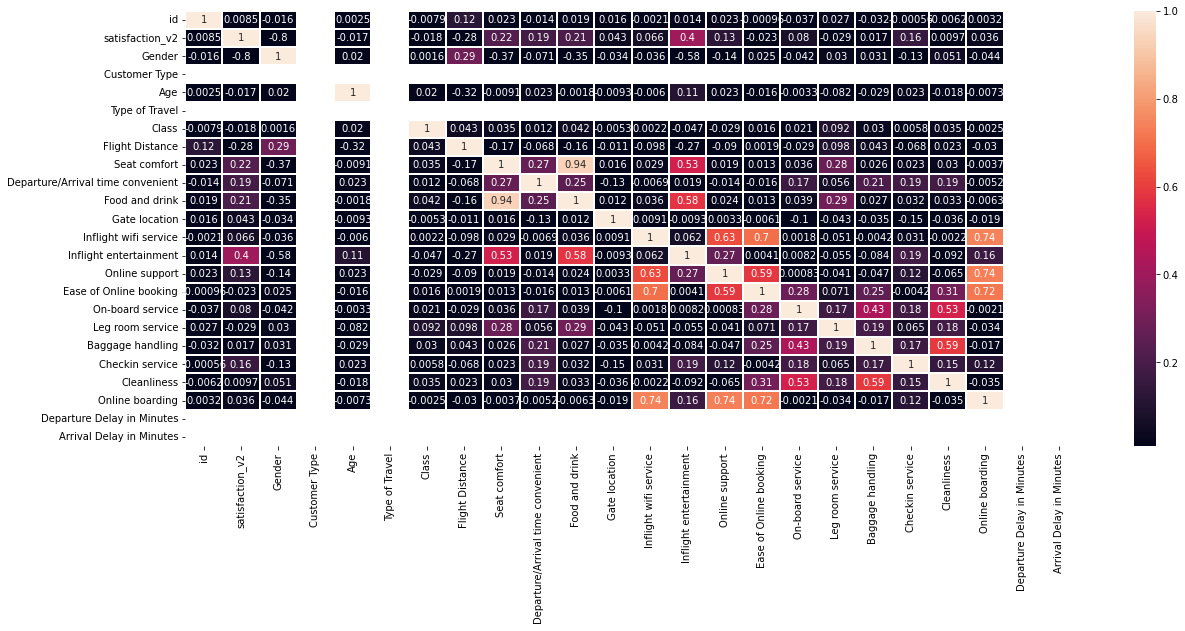

In [28]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.01,vmax=1,annot=True,linewidth=0.2)

Correlation between Departure Delay in minutes and Arrival Delay in minutes is so high then we can drop one of them 
also we can drop column id

In [29]:
x=df.drop(['id','Arrival Delay in Minutes','satisfaction_v2'],axis=1)

In [30]:
y=df['satisfaction_v2']

In [31]:
x.shape

(4000, 21)

In [32]:
#Features Engineering

In [33]:
x.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [34]:
x['Amenities']=df[['Food and drink','Seat comfort','Inflight entertainment','Cleanliness']].sum(axis=1)

In [35]:
x['Services']=df[['On-board service','Leg room service','Baggage handling','Checkin service','Inflight wifi service']].sum(axis=1)

In [36]:
x=x.drop(['Food and drink','Seat comfort','Inflight entertainment','Cleanliness','On-board service','Leg room service','Baggage handling','Checkin service','Inflight wifi service'],axis=1)

In [37]:
x.shape

(4000, 14)

In [38]:
x.head(10) 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online support,Ease of Online booking,Online boarding,Departure Delay in Minutes,Amenities,Services
0,0,0,65,0,1,265,0,2,2,3,2,0,7,13
1,1,0,47,0,0,2464,0,3,2,3,2,0,5,14
2,0,0,15,0,1,2138,0,3,2,2,2,0,4,16
3,0,0,60,0,1,623,0,3,3,1,3,0,5,9
4,0,0,70,0,1,354,0,3,4,2,5,0,5,12
5,1,0,30,0,1,1894,0,3,2,2,2,0,4,21
6,0,0,66,0,1,227,0,3,5,5,3,0,10,17
7,1,0,10,0,1,1812,0,3,2,2,2,0,4,17
8,0,0,56,0,0,73,0,3,5,4,4,0,7,15
9,1,0,22,0,1,1556,0,3,2,2,2,0,4,16


In [39]:
#splitting the data

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [41]:
x_train.shape

(3000, 14)

In [42]:
y_train.shape

(3000,)

In [43]:
x_test.shape

(1000, 14)

In [44]:
y_test.shape


(1000,)

In [45]:
#Scaling
from sklearn.preprocessing import  StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)


In [46]:
#EDA

In [47]:
df.describe()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.0,4000.000000,4000.00000,4000.000000,4000.000000,...,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.0
mean,65193.410750,0.591750,0.490750,0.0,38.342500,0.0,1.049750,1819.82350,1.474500,2.811500,...,3.240500,3.03650,3.092500,2.985750,3.374500,3.248750,3.420000,3.159500,0.0,0.0
std,37519.850187,0.491571,0.499977,0.0,18.529045,0.0,0.421093,875.90528,1.756736,1.641232,...,1.384608,1.38208,1.305132,1.543581,1.241626,1.273098,1.202897,1.365476,0.0,0.0
min,22.000000,0.000000,0.000000,0.0,7.000000,0.0,0.000000,50.00000,0.000000,0.000000,...,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,33531.000000,0.000000,0.000000,0.0,22.000000,0.0,1.000000,1268.25000,0.000000,1.000000,...,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.0,0.0
50%,65139.000000,1.000000,0.000000,0.0,38.000000,0.0,1.000000,1832.00000,1.000000,3.000000,...,3.000000,3.00000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.0,0.0
75%,97368.000000,1.000000,1.000000,0.0,54.000000,0.0,1.000000,2311.00000,1.000000,4.000000,...,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0,0.0
max,129853.000000,1.000000,1.000000,0.0,70.000000,0.0,2.000000,6811.00000,5.000000,5.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


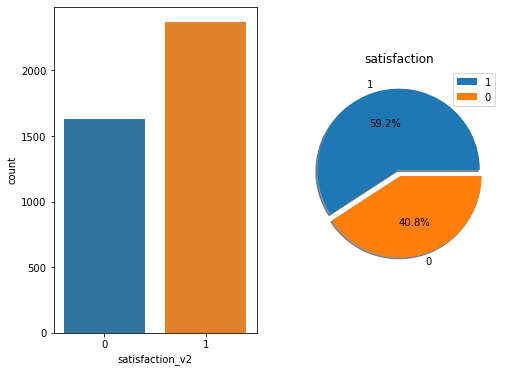

In [48]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(x=df['satisfaction_v2'])

plt.subplot(1,2,2)
count_test=df['satisfaction_v2'].value_counts()
labels=df['satisfaction_v2'].value_counts().index
plt.pie(count_test,labels=labels,shadow=True,explode=(0,0.08),autopct='%1.1f%%')
plt.legend(labels)
plt.title('satisfaction')
plt.show()

From this we can see that more than 50% are not satisfiead

In [49]:
df_sat=df.loc[df['satisfaction_v2']==0]
df_notsat=df.loc[df['satisfaction_v2']==1]

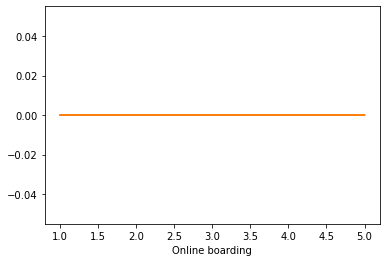

In [50]:
plt.plot(df_sat['Online boarding'],np.zeros_like(df_sat['Online boarding']))
plt.plot(df_notsat['Online boarding'],np.zeros_like(df_notsat['Online boarding']))
plt.xlabel('Online boarding')
plt.show()

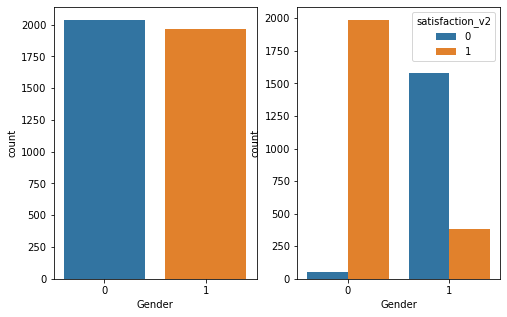

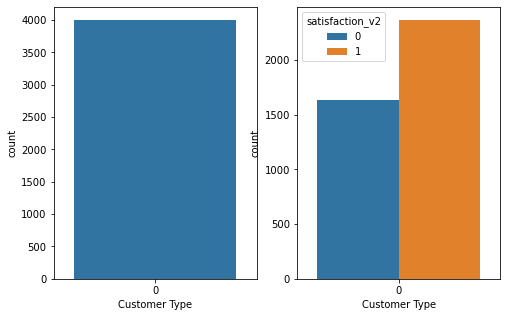

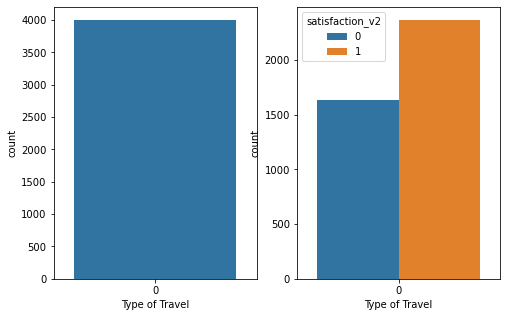

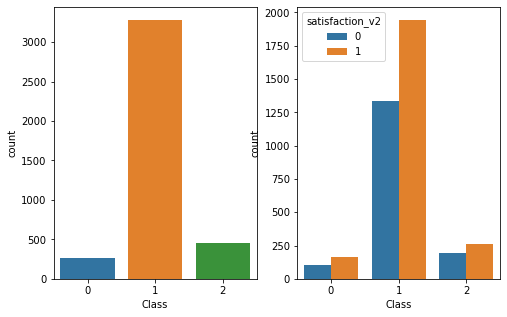

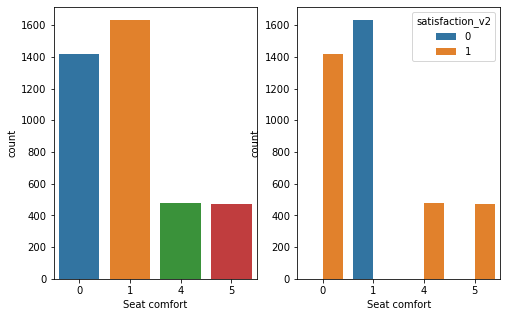

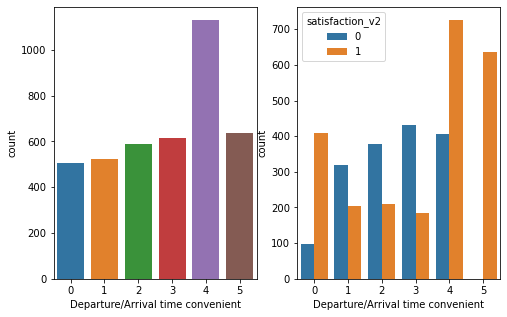

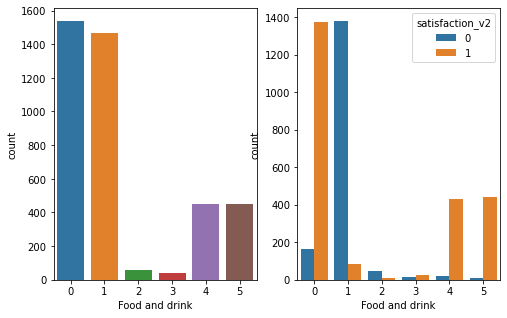

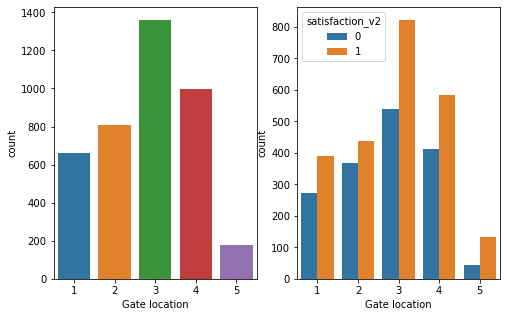

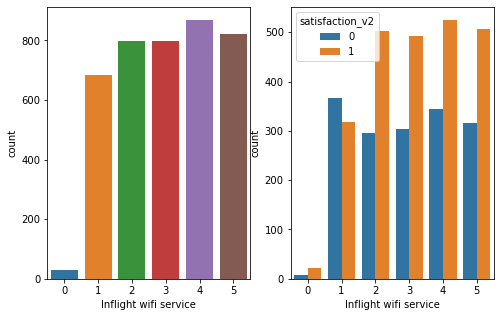

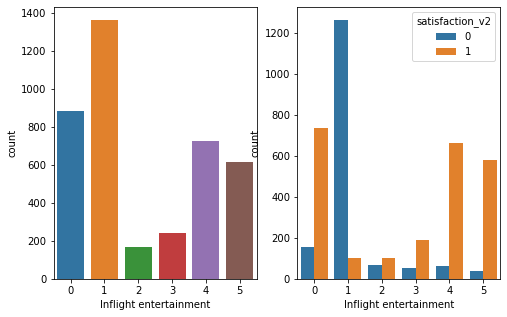

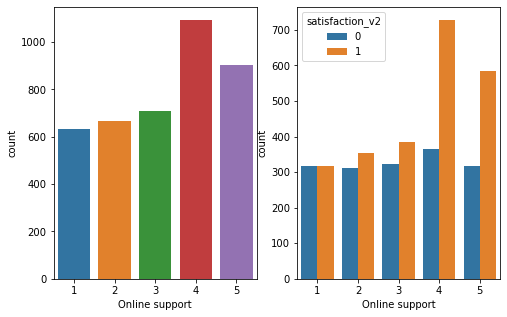

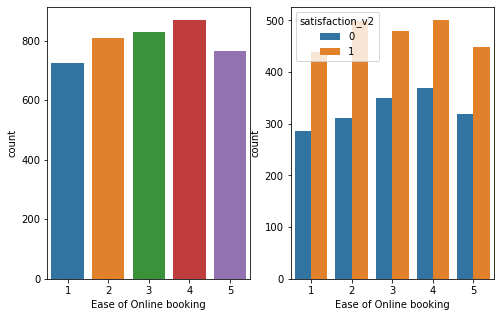

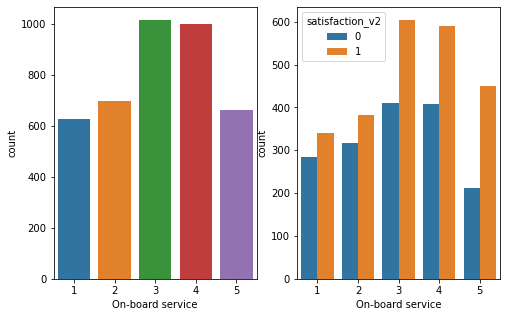

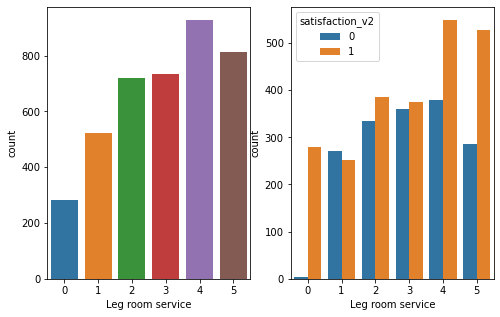

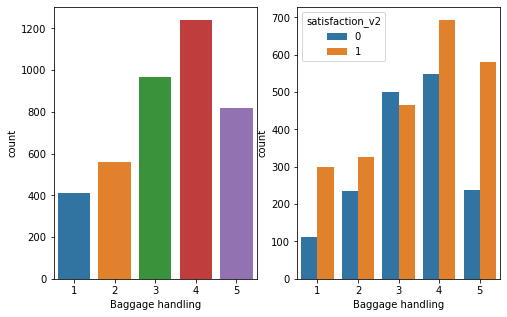

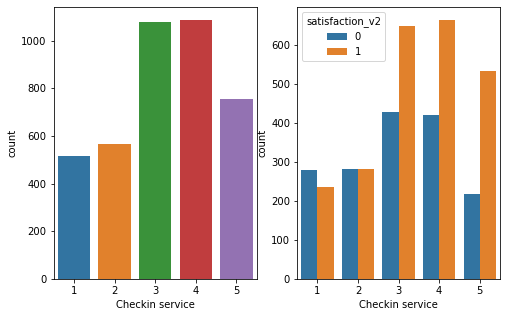

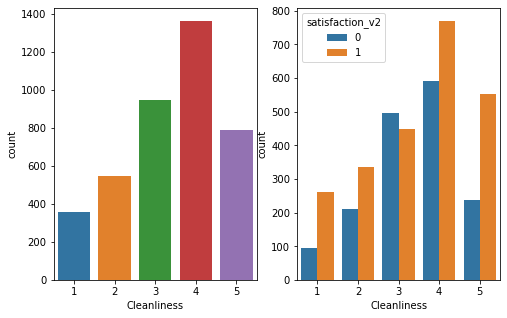

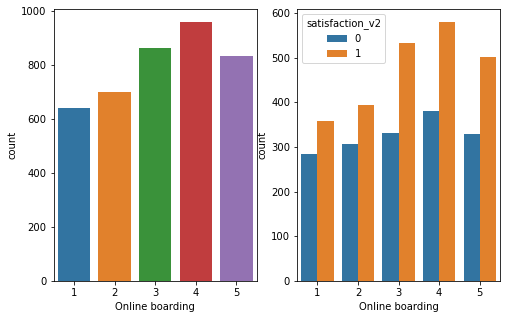

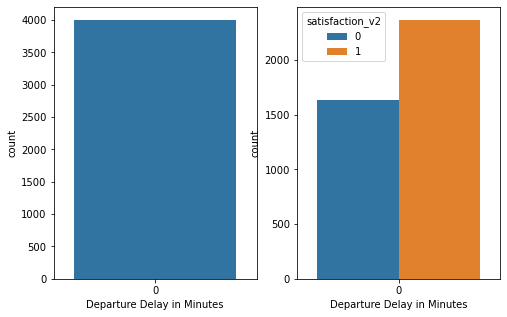

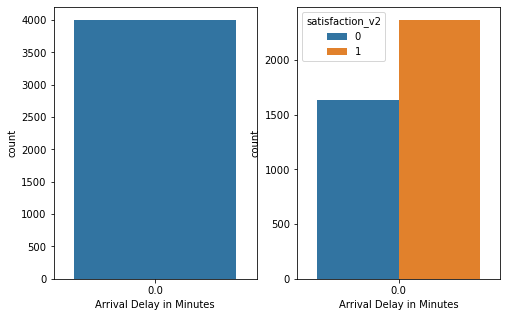

In [51]:
for i in df.columns:
    if len(df[i].unique())<=6 and i !='satisfaction_v2':
        plt.figure (figsize=(8,5))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],data=df)
        
        plt.subplot(1,2,2)
        sns.countplot(x=df[i],hue='satisfaction_v2',data=df)
        plt.show()

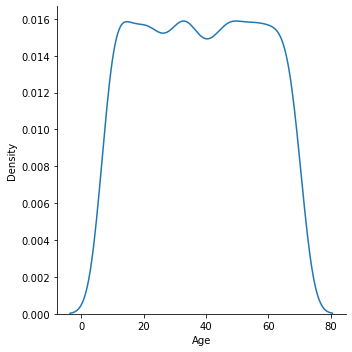

In [52]:
sns.displot(data=df,x='Age',kind='kde')

The Most age range from 25 to 35 and from 40 to 60 This means to focus more on the needs of them

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

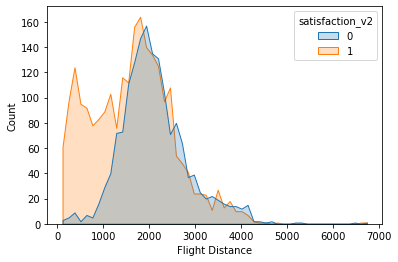

In [53]:
sns.histplot(x='Flight Distance',hue='satisfaction_v2',data=df,element='poly')

In [54]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [55]:
g_data=df.groupby('Class')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_11528/3479154335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_data=df.groupby('Class')['Departure/Arrival time convenient','Food and drink','Gate location',


<AxesSubplot:>

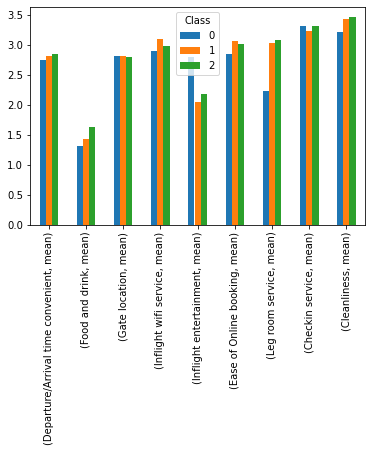

In [56]:
g_data.T.plot(kind='bar')

In [57]:
g_data1=df.groupby('Type of Travel')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_11528/499687406.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_data1=df.groupby('Type of Travel')['Departure/Arrival time convenient','Food and drink','Gate location',


<AxesSubplot:>

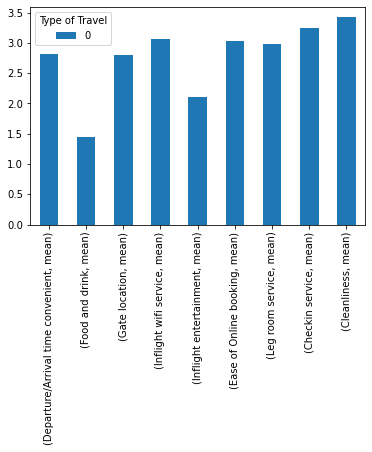

In [58]:
g_data1.T.plot(kind='bar')

In [59]:
g_data2=df.groupby('Customer Type')['Departure/Arrival time convenient','Food and drink','Gate location',
       'Inflight wifi service', 'Inflight entertainment',
       'Ease of Online booking', 'Leg room service', 'Checkin service', 'Cleanliness'].agg(['mean'])

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_11528/4221949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_data2=df.groupby('Customer Type')['Departure/Arrival time convenient','Food and drink','Gate location',


<AxesSubplot:>

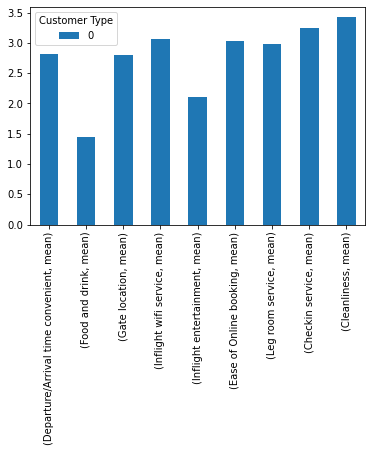

In [60]:
g_data2.T.plot(kind='bar')

In [61]:
#Modeling

In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

In [65]:
def classification_task( model,x_train, y_train ,x_test,y_test, predic,model_name):
 
    table=pd.DataFrame({'Train_Score':model.score(x_train,y_train),"Test_Score":model.score(x_test,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return table

1.Support Vector Machine

In [66]:
#Fittting kernel svm to the training set
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)
predictions

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [67]:
print('accuracy is:',accuracy_score(y_test,predictions))

accuracy is: 0.923


.KNN

In [70]:
# Train KNN model on the scaled data 
KNN = KNeighborsClassifier()
# Fit the model
KNN.fit(x_train,y_train)
#predict x_test_scaled
pred2 = KNN.predict(x_test)

In [71]:
Eval_KNN= classification_task(KNN,x_train, y_train ,x_test ,y_test,pred2,"KNN" )
Eval_KNN

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.934667,0.914,0.966372,0.890701,0.926995,0.914


.Decision Tree

In [72]:
# Train decision tree model on the scaled data
Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(x_train,y_train)
#predict x_test_scaled
pred3 = Decision_Tree.predict(x_test)

In [73]:
Eval_dec = classification_task(Decision_Tree,x_train, y_train ,x_test ,y_test,pred3,"Decision Tree" )
Eval_dec

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.0,0.935,0.953642,0.939641,0.94659,0.935


Random Forest

In [74]:
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(x_train,y_train)
#predict x_test_scaled
pred4 = Random_Forest.predict(x_test)

In [75]:
Eval_fores= classification_task(Random_Forest,x_train, y_train ,x_test ,y_test,pred4,"Random Forest" )
Eval_fores

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest,1.0,0.956,0.968699,0.959217,0.963934,0.956


XGB boost

In [78]:
# Train XGB boost model on the scaled data
xgb = XGBClassifier()
# Fit the model
xgb.fit(x_train,y_train)
#predict x_test_scaled
pred5 = xgb.predict(x_test)

In [79]:
Eval_XGB= classification_task(xgb,x_train, y_train ,x_test ,y_test,pred5,"XGB" )
Eval_XGB

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
XGB,1.0,0.95,0.965289,0.952692,0.958949,0.95


Naive bayes

In [80]:
# Train naive bayes boost model on the scaled data
clf = GaussianNB()
# Fit the model
clf.fit(x_train,y_train)
#predict x_test_scaled
pred6 = clf.predict(x_test)

In [81]:
Eval_clf= classification_task(clf,x_train, y_train ,x_test ,y_test,pred6,"Naive Bayes" )
Eval_clf

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Naive Bayes,0.887667,0.89,0.970093,0.846656,0.904181,0.89


logisticRegression

In [82]:
lr = LogisticRegression()
# Fit the model
lr.fit(x_train, y_train)
#predict x_test_scaled
pred7 = lr.predict(x_test)
#calling the score function

In [83]:
Eval_lr= classification_task(lr,x_train, y_train ,x_test ,y_test,pred7,"logisitc regression" )
Eval_lr

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.929,0.926,0.976991,0.900489,0.937182,0.926


from these random forest is best model to prect satisfaction

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}


In [89]:
##from sklearn.model_selection import GridSearchCV
##import pandas as pd
#3scores = []

##for model_name, mp in model_params.items():
   ##clf.fit(x_train, y_train)
    ##cores.append({
        ##'model': model_name,
       ## 'best_score': clf.best_score_,
        ##'best_params': clf.best_params_
   ## })
    
##df_table= pd.DataFrame(scores,columns=['model','best_score','best_params'])
##df_table